#Análisis de ventas en función de la publicidad

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df = pd.read_csv("Advertising.csv", delimiter=',', encoding='utf-8')
df = df.iloc[:, 1:]
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## 1. Analizar correlación entre las variables


Para analizar la correlación entre variables realizamos los scatter plots correspondientes entre cada combinación posible de variable dependiente - vaariable independiente. A simple vista, podemos observar que las variables **Radio** y **TV** presentan una suerte de correlación lineal con la variable **Sales**

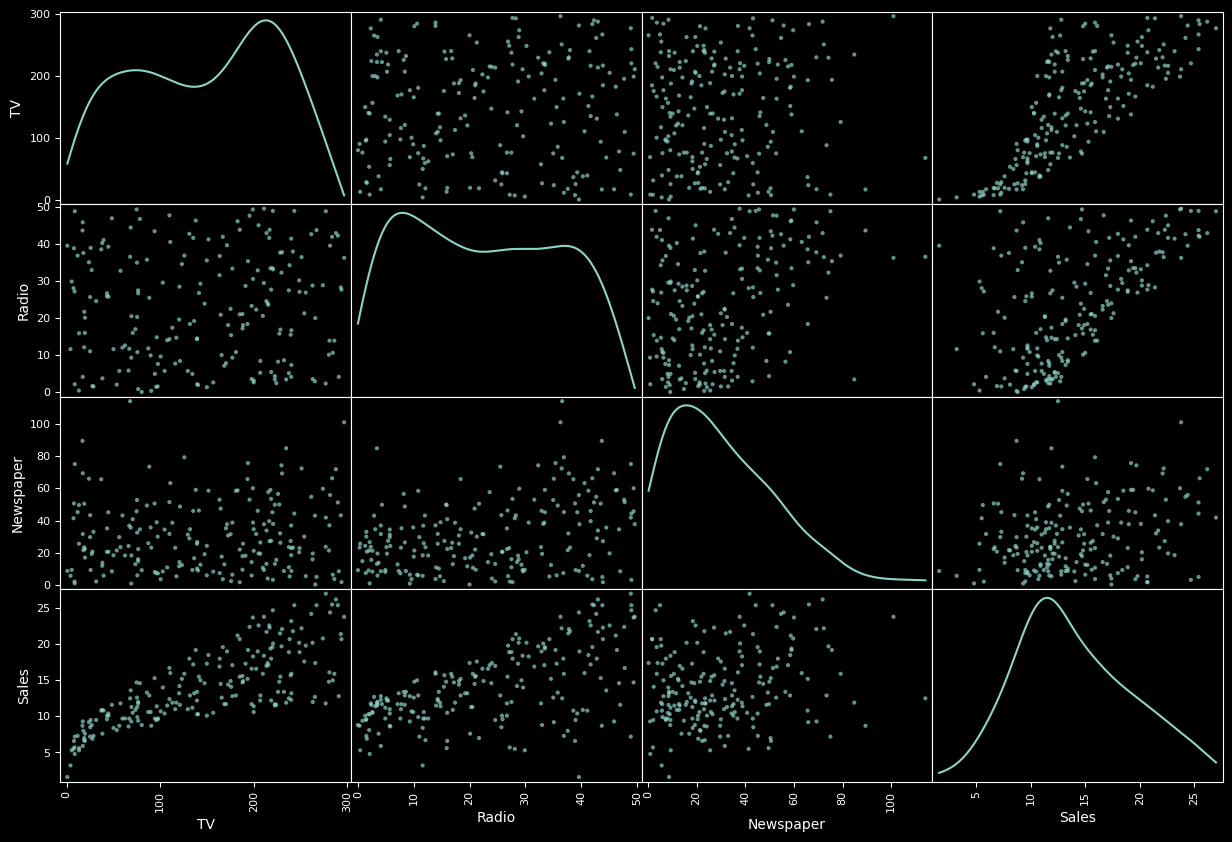

In [21]:
with plt.style.context('dark_background'):
  pd.plotting.scatter_matrix(df, alpha=0.7, figsize=(15, 10), diagonal='kde')
plt.show()

## 2. Realizar los modelos de regresión lineal simple


Variable independiente: TV, Variable dependiente: Radio


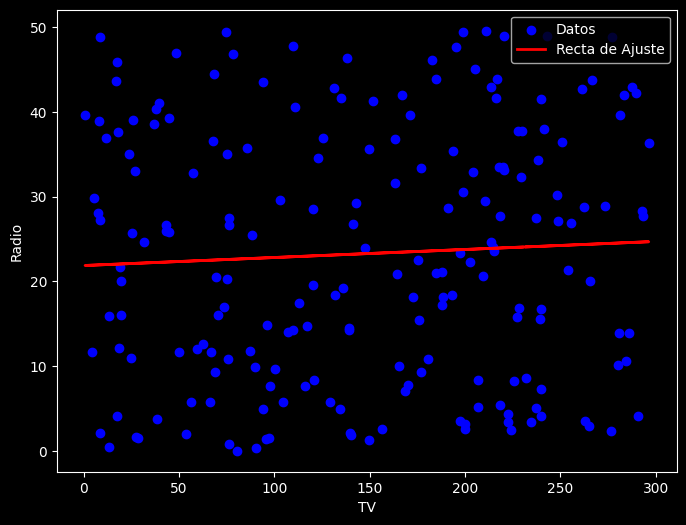

Variable independiente: TV, Variable dependiente: Newspaper


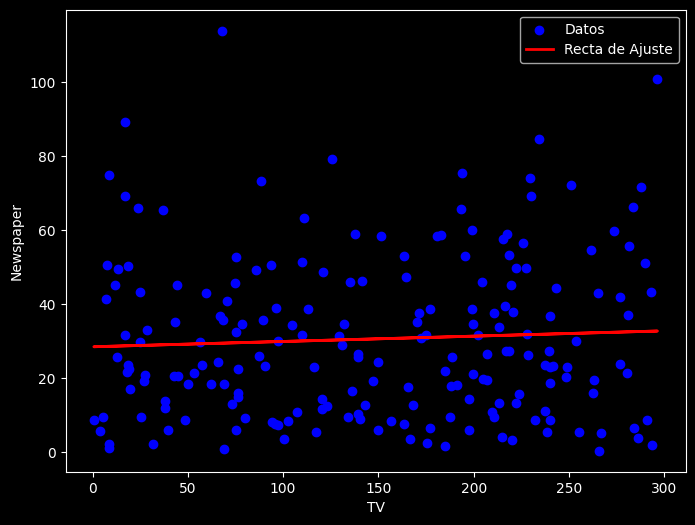

Variable independiente: TV, Variable dependiente: Sales


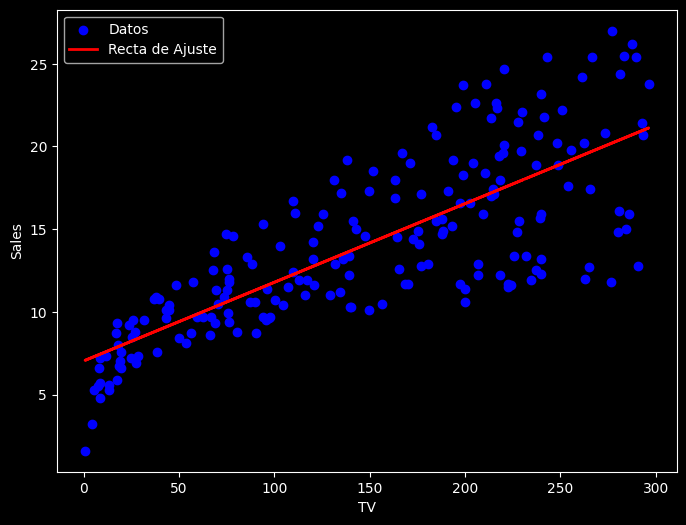

Variable independiente: Radio, Variable dependiente: TV


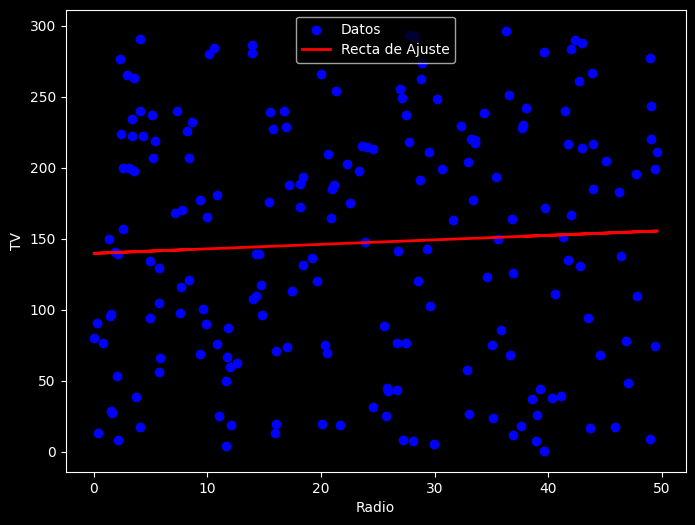

Variable independiente: Radio, Variable dependiente: Newspaper


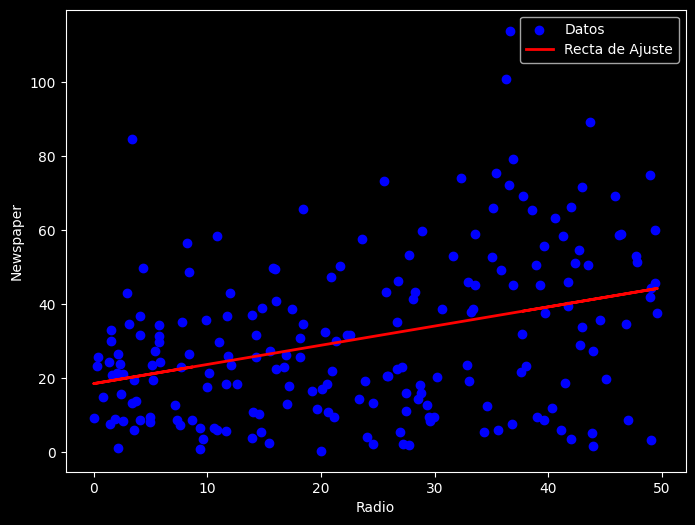

Variable independiente: Radio, Variable dependiente: Sales


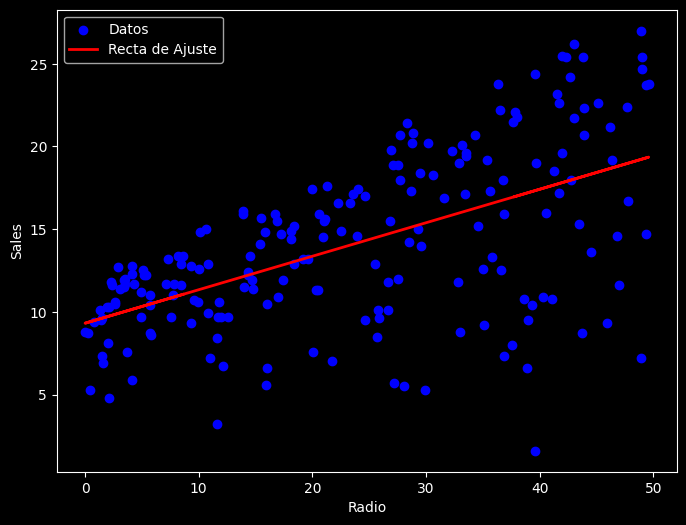

Variable independiente: Newspaper, Variable dependiente: TV


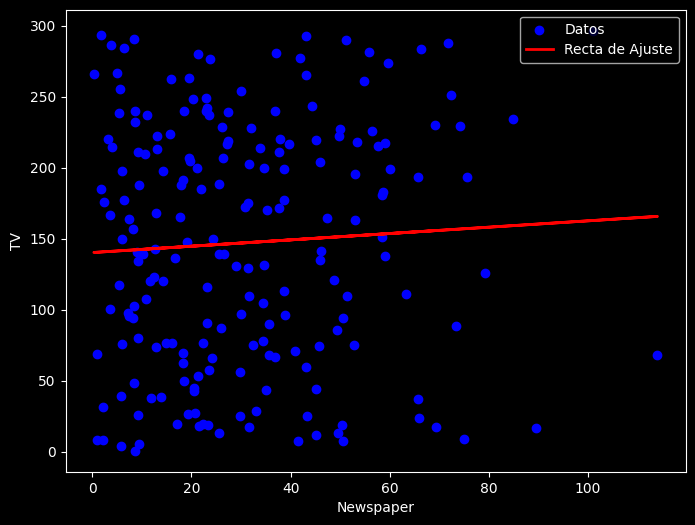

Variable independiente: Newspaper, Variable dependiente: Radio


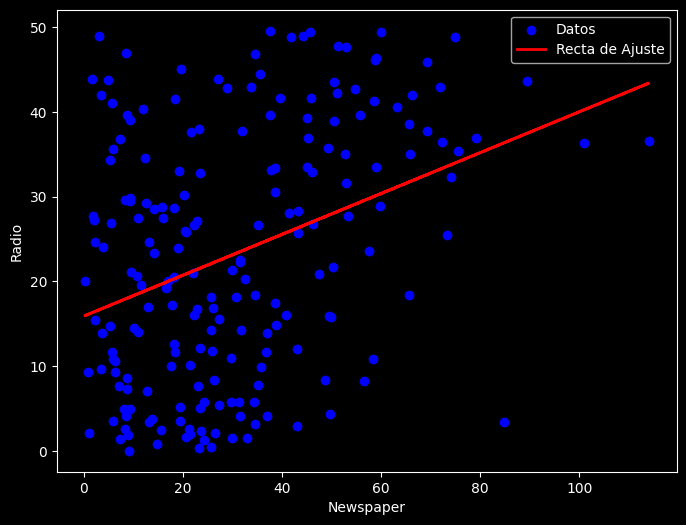

Variable independiente: Newspaper, Variable dependiente: Sales


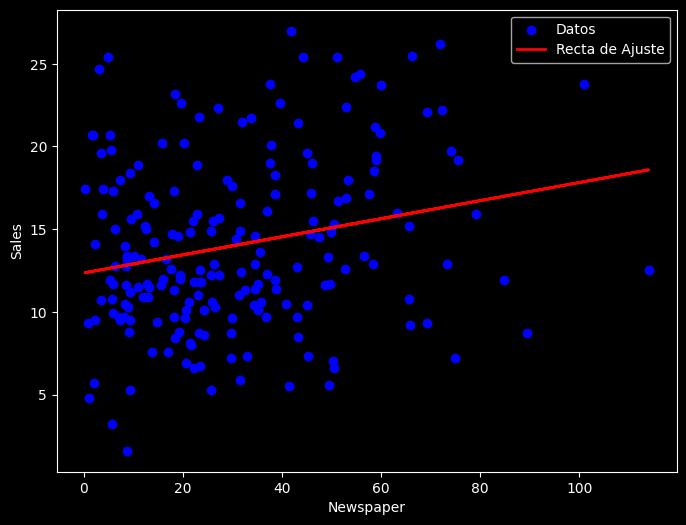

Variable independiente: Sales, Variable dependiente: TV


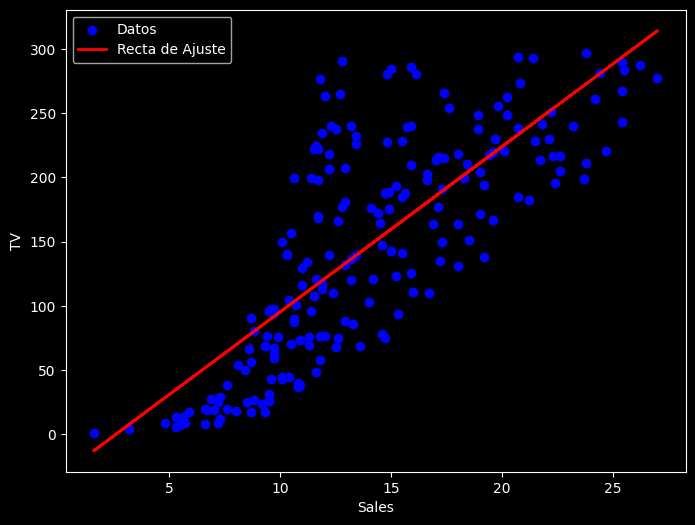

Variable independiente: Sales, Variable dependiente: Radio


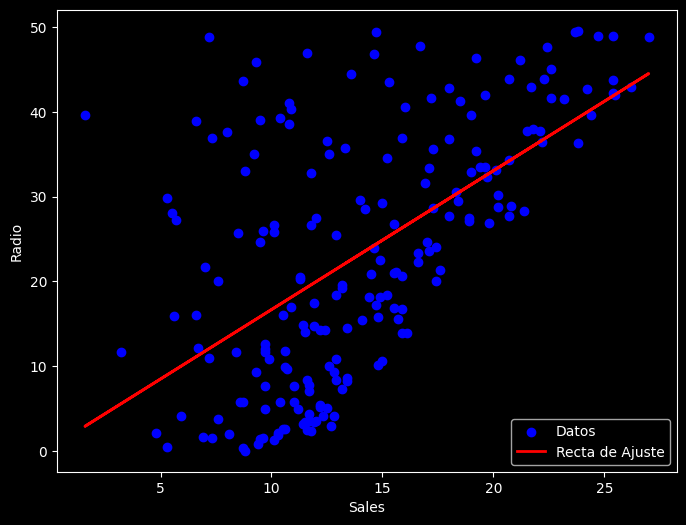

Variable independiente: Sales, Variable dependiente: Newspaper


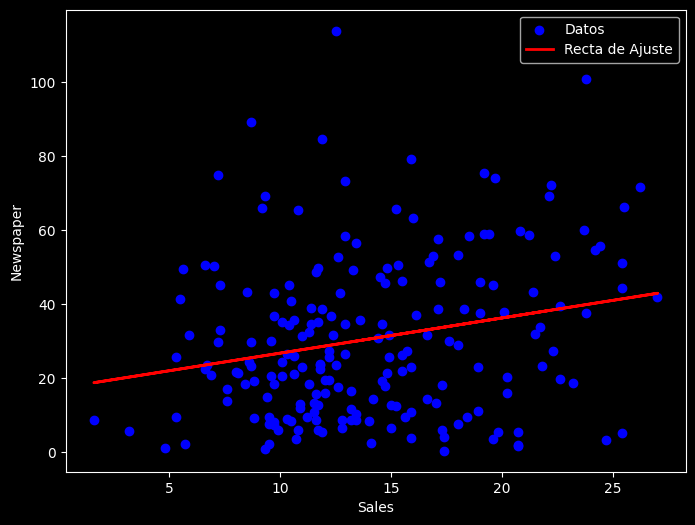

In [22]:
for col1 in df.columns:
  for col2 in df.columns:
    if col1 != col2:
      X = df[col1]
      y = df[col2]
      X = sm.add_constant(X) #bo
      model = sm.OLS(y, X).fit()
      print(f"Variable independiente: {col1}, Variable dependiente: {col2}")
      with plt.style.context('dark_background'):
        plt.figure(figsize=(8,6))
        plt.scatter(X.iloc[:, 1], y, color='blue', label='Datos')
        plt.plot(X.iloc[:, 1], model.predict(X), color='red', linewidth=2, label='Recta de Ajuste')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend()
      plt.show()

In [23]:
results = []

for col1 in df.columns:
  for col2 in df.columns:
    if col1 != col2:
      X = df[col1]
      y = df[col2]
      X = sm.add_constant(X)  # bo
      model = sm.OLS(y, X).fit()

      r_squared = model.rsquared
      adj_r_squared = model.rsquared_adj
      f_test = model.fvalue
      f_test_p_value = model.f_pvalue

      results.append([col1, col2, r_squared, adj_r_squared, f_test, f_test_p_value])

results_df = pd.DataFrame(results, columns=['Independent_Variable', 'Dependent_Variable', 'R_squared', 'Adj_R_squared', 'F_test', 'F_test_p_value'])
styled_df = results_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(styled_df)


,Independent_Variable,Dependent_Variable,R_squared,Adj_R_squared,F_test,F_test_p_value
0,TV,Radio,0.003004,-0.002031,0.596582,0.440806
1,TV,Newspaper,0.003209,-0.001825,0.637424,0.425602
2,TV,Sales,0.611875,0.609915,312.144994,0.000000
3,Radio,TV,0.003004,-0.002031,0.596582,0.440806
4,Radio,Newspaper,0.125389,0.120972,28.386480,0.000000
5,Radio,Sales,0.332032,0.328659,98.421588,0.000000
6,Newspaper,TV,0.003209,-0.001825,0.637424,0.425602
7,Newspaper,Radio,0.125389,0.120972,28.386480,0.000000
8,Newspaper,Sales,0.052120,0.047333,10.887299,0.001148
9,Sales,TV,0.611875,0.609915,312.144994,0.000000


## 3. Realizar el modelo de regresión lineal múltiple


In [24]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X = sm.add_constant(X)
model_3v = sm.OLS(y, X).fit()
print(model_3v.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        02:28:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [25]:
def multiple_regression(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    return model

X1 = df[['TV','Radio']]
X2 = df[['Radio', 'Newspaper']]
X3 = df[['Newspaper', 'TV']]
model_tv_radio = multiple_regression(X1, y)
print(model_tv_radio.summary())
model_radio_np = multiple_regression(X2, y)
print(model_radio_np.summary())
model_radio_tv = multiple_regression(X3, y)
print(model_radio_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.83e-98
Time:                        02:28:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

## 4. Realizar diagnóstico del modelo


In [26]:
residuals_3v = model_3v.resid
residuals_radio_tv = model_radio_tv.resid

### QQ plot

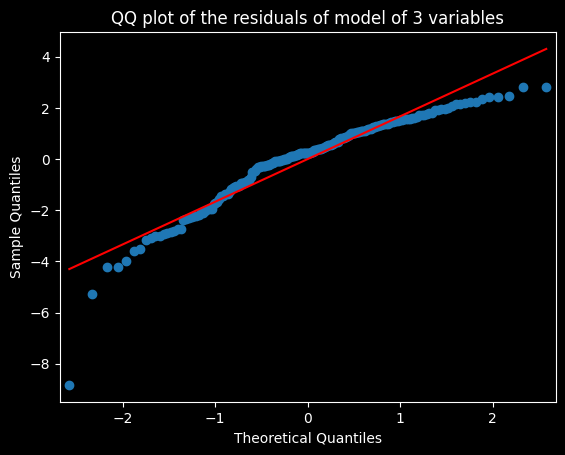

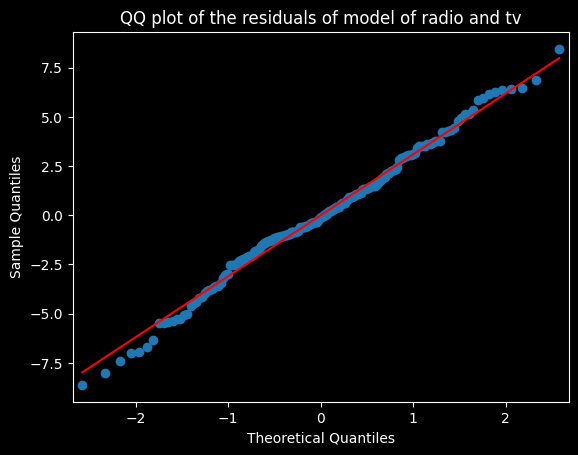

In [27]:
with plt.style.context('dark_background'):
  sm.qqplot(residuals_3v, line='s')
  plt.title('QQ plot of the residuals of model of 3 variables')
plt.show()

with plt.style.context('dark_background'):
  sm.qqplot(residuals_radio_tv, line='s')
  plt.title('QQ plot of the residuals of model of radio and tv')
plt.show()

###Histograma

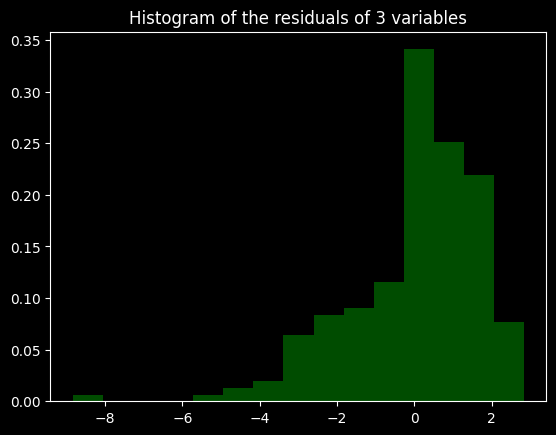

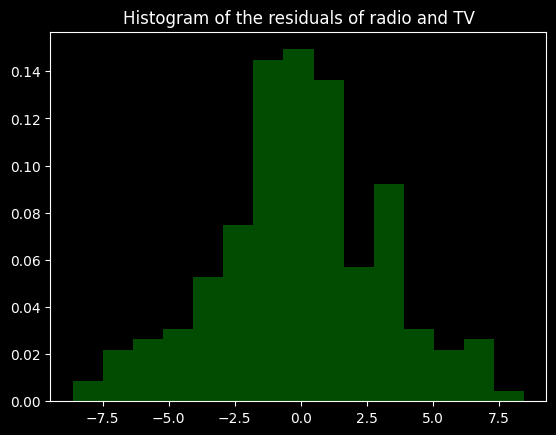

In [28]:
with plt.style.context('dark_background'):
  plt.hist(residuals_3v, bins=15, density=True, alpha=0.6, color='g')
  plt.title('Histogram of the residuals of 3 variables')
plt.show()

with plt.style.context('dark_background'):
  plt.hist(residuals_radio_tv, bins=15, density=True, alpha=0.6, color='g')
  plt.title('Histogram of the residuals of radio and TV')
plt.show()

###Test de normalidad

In [29]:
_, p_value_3v = stats.normaltest(residuals_3v)
print(f"P-value for normality test: {p_value_3v}")
if p_value_3v < 0.05:
  print("Los residuos no están distribuidos de manera normal")
else:
  print("Los residuos están distribuidos de manera normal")

_, p_value_radio_tv = stats.normaltest(residuals_radio_tv)
print(f"P-value for normality test: {p_value_radio_tv}")
if p_value_radio_tv < 0.05:
  print("Los residuos no están distribuidos de manera normal")
else:
  print("Los residuos están distribuidos de manera normal")

P-value for normality test: 7.608085583222548e-14
Los residuos no están distribuidos de manera normal
P-value for normality test: 0.7197251520352044
Los residuos están distribuidos de manera normal


## 5. Analizar la influencia de cada variable en las ventas


## 6. Dividir el conjunto total en un conjunto de entrenamiento y otro de prueba y calcular las matrices de confusión, accuracy, precision y recall

In [30]:
X_train_3v, X_test_3v, y_train_3v, y_test_3v = train_test_split(X, y, test_size=0.2, random_state=42)
model_tt_3v = sm.OLS(y_train_3v, X_train_3v).fit()
y_pred_3v = model_tt_3v.predict(X_test_3v)

Las matrices de confusión, la precisión, la recuperación y la exactitud se utilizan típicamente en problemas de clasificación, no en problemas de regresión. Para un problema de regresión, normalmente se evalúa el rendimiento utilizando métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) o el coeficiente de determinación (R-cuadrado).

In [31]:
mse_3v = mean_squared_error(y_test_3v, y_pred_3v)
r2_3v = r2_score(y_test_3v, y_pred_3v)
print(f"Mean Squared Error: {mse_3v}")
print(f"R-squared: {r2_3v}")

Mean Squared Error: 3.1740973539761037
R-squared: 0.899438024100912


Calculamos solo teniendo en cuenta radio y TV

In [32]:
X_train_radio_tv, X_test_radio_tv, y_train_radio_tv, y_test_radio_tv = train_test_split(X1, y, test_size=0.2, random_state=42)
model_tt_radio_tv = sm.OLS(y_train_radio_tv, X_train_radio_tv).fit()
y_pred_radio_tv = model_tt_radio_tv.predict(X_test_radio_tv)

In [33]:
mse_radio_tv = mean_squared_error(y_test_radio_tv, y_pred_radio_tv)
r2_radio_tv = r2_score(y_test_radio_tv, y_pred_radio_tv)
print(f"Mean Squared Error: {mse_radio_tv}")
print(f"R-squared: {r2_radio_tv}")

Mean Squared Error: 4.23297458632104
R-squared: 0.8658906010561285
